# Library

In [1]:
# Library to dataset
import os
import zipfile
import numpy as np
import pandas as pd

# Surpress Warnings
import warnings
warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
# library visualization
import matplotlib.pyplot as plt

# Library Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Others
import shutil
import random

# Confusion Matrix and Classification Report
from sklearn.metrics import confusion_matrix, classification_report
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import f1_score

# Dataset

In [2]:
# Load dataset
print("==========================Training Data====================")
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    "Dataset/Corn/train",
    label_mode="categorical",
    class_names=['Corn Gray leaf spot','Corn healthy','Corn leaf blight','Corn rust leaf'],
    color_mode="rgb",
    batch_size=1,
    image_size=(256, 256),
    shuffle=True,
    seed=123
)
print("==========================Validation Data====================")
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    "Dataset/Corn/valid",
    label_mode="categorical",
    class_names=['Corn Gray leaf spot','Corn healthy','Corn leaf blight','Corn rust leaf'],
    color_mode="rgb",
    batch_size=1,
    image_size=(256, 256),
    shuffle=False,
    seed=123
)

==========================Training Data====================
Found 7665 files belonging to 4 classes.
==========================Validation Data====================
Found 1855 files belonging to 4 classes.


In [3]:
# All images will be rescaled by 1./255.and augmented
train_datagen = ImageDataGenerator(rescale = 1.0/256.,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen  = ImageDataGenerator(rescale = 1.0/256.)

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory("Dataset/Corn/train",
                                                    batch_size=20,
                                                    class_mode='categorical',
                                                    target_size=(224, 224))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory("Dataset/Corn/valid",
                                                         batch_size=20,
                                                         class_mode  = 'categorical',
                                                         target_size = (224, 224),
                                                         shuffle=False)

Found 7665 images belonging to 4 classes.
Found 1855 images belonging to 4 classes.


# Model Non Augmented Evaluating

## Model Dense121 Version 1 Corn Non Augmented

In [4]:
# Load model
Dense_Non_Aug1 = tf.keras.models.load_model('Modelling/Corn/Non Augmented/Saved Model/Corn_DenseNet_model1_Based_Non_Augmented')

In [5]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Dense_Non_Aug1 = Dense_Non_Aug1.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Dense_Non_Aug1[1]*100))
print("Loss: %.6f%%" % (scores_Dense_Non_Aug1[0]*100))

==========================Evaluate Model====================
93/93 [==============================] - 12s 65ms/step - loss: 0.0489 - accuracy: 0.9860
Accuracy: 98.598385%
Loss: 4.888219%


==========================Confusion Matrix====================
93/93 [==============================] - 6s 49ms/step


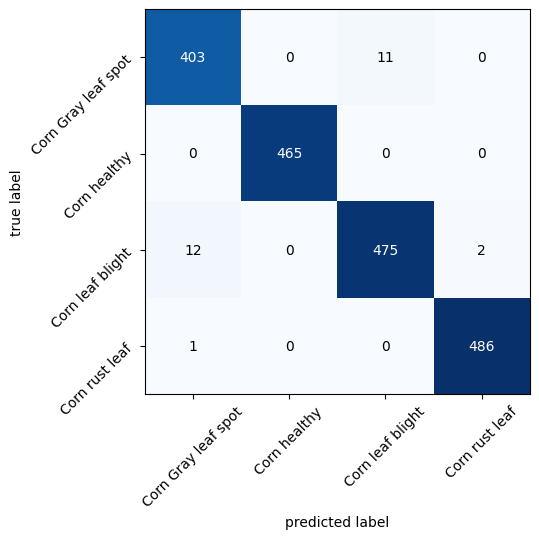

==========================Classification Report====================
Classification Report
                     precision    recall  f1-score   support

Corn Gray leaf spot       0.97      0.97      0.97       414
       Corn healthy       1.00      1.00      1.00       465
   Corn leaf blight       0.98      0.97      0.97       489
     Corn rust leaf       1.00      1.00      1.00       487

           accuracy                           0.99      1855
          macro avg       0.99      0.99      0.99      1855
       weighted avg       0.99      0.99      0.99      1855

==========================F1 Score====================
F1 Score :  0.9855915971578623


In [6]:
# Confusion Matrix and Classification Report
target_names = ['Corn Gray leaf spot','Corn healthy','Corn leaf blight','Corn rust leaf']
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = Dense_Non_Aug1.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')

print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# F1 Score
print("==========================F1 Score====================")
f1_corn_dense_non_aug1 = f1_score(validation_generator.classes, y_pred, average='macro')
print('F1 Score : ', f1_corn_dense_non_aug1)

## Model Dense121 Version 2 Corn Non Augmented

In [7]:
# Load model
Dense_Non_Aug2 = tf.keras.models.load_model('Modelling/Corn/Non Augmented/Saved Model/Corn_DenseNet_model2_Based_Non_Augmented')

In [8]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Dense_Non_Aug2 = Dense_Non_Aug2.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Dense_Non_Aug2[1]*100))
print("Loss: %.6f%%" % (scores_Dense_Non_Aug2[0]*100))

==========================Evaluate Model====================
93/93 [==============================] - 7s 53ms/step - loss: 0.0552 - accuracy: 0.9876
Accuracy: 98.760110%
Loss: 5.524961%


==========================Confusion Matrix====================
93/93 [==============================] - 6s 48ms/step


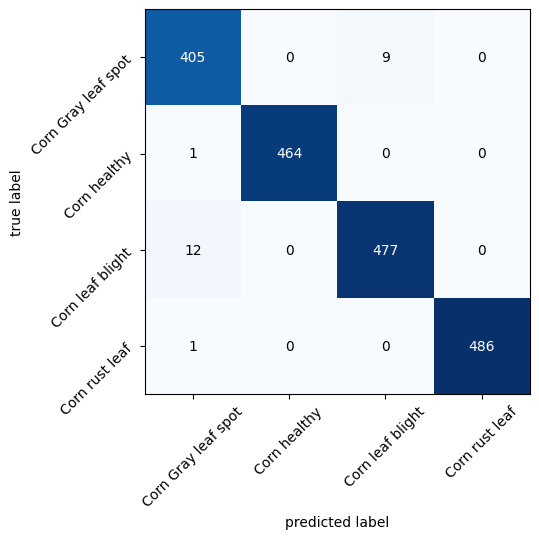

==========================Classification Report====================
Classification Report
                     precision    recall  f1-score   support

Corn Gray leaf spot       0.97      0.98      0.97       414
       Corn healthy       1.00      1.00      1.00       465
   Corn leaf blight       0.98      0.98      0.98       489
     Corn rust leaf       1.00      1.00      1.00       487

           accuracy                           0.99      1855
          macro avg       0.99      0.99      0.99      1855
       weighted avg       0.99      0.99      0.99      1855

==========================F1 Score====================
F1 Score :  0.9871865796374456


In [9]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = Dense_Non_Aug2.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# F1 Score
print("==========================F1 Score====================")
f1_corn_dense_non_aug2 = f1_score(validation_generator.classes, y_pred, average='macro')
print('F1 Score : ', f1_corn_dense_non_aug2)

## MobileNet V2 Version 1 Corn Non Augmented

In [10]:
# Load model
Mobile_Non_Aug1 = tf.keras.models.load_model('Modelling/Corn/Non Augmented/Saved Model/Corn_MobileNetV2_model1_Based_Non_Augmented')

In [11]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Mobile_Non_Aug1 = Mobile_Non_Aug1.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Mobile_Non_Aug1[1]*100))
print("Loss: %.6f%%" % (scores_Mobile_Non_Aug1[0]*100))

==========================Evaluate Model====================
93/93 [==============================] - 4s 30ms/step - loss: 0.0718 - accuracy: 0.9849
Accuracy: 98.490566%
Loss: 7.177754%


==========================Confusion Matrix====================
93/93 [==============================] - 3s 24ms/step


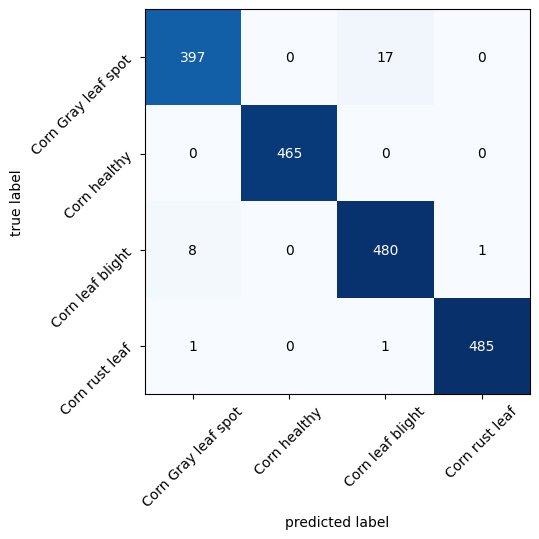

==========================Classification Report====================
Classification Report
                     precision    recall  f1-score   support

Corn Gray leaf spot       0.98      0.96      0.97       414
       Corn healthy       1.00      1.00      1.00       465
   Corn leaf blight       0.96      0.98      0.97       489
     Corn rust leaf       1.00      1.00      1.00       487

           accuracy                           0.98      1855
          macro avg       0.98      0.98      0.98      1855
       weighted avg       0.98      0.98      0.98      1855

==========================F1 Score====================
F1 Score :  0.9844634530347403


In [12]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = Mobile_Non_Aug1.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# F1 Score
print("==========================F1 Score====================")
f1_corn_mobile_non_aug1 = f1_score(validation_generator.classes, y_pred, average='macro')
print('F1 Score : ', f1_corn_mobile_non_aug1)

## MobileNet V2 Version 2 Corn Non Augmented

In [13]:
# Load model
Mobile_Non_Aug2 = tf.keras.models.load_model('Modelling/Corn/Non Augmented/Saved Model/Corn_MobileNetV2_model2_Based_Non_Augmented')

In [14]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Mobile_Non_Aug2 = Mobile_Non_Aug2.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Mobile_Non_Aug2[1]*100))
print("Loss: %.6f%%" % (scores_Mobile_Non_Aug2[0]*100))

==========================Evaluate Model====================
93/93 [==============================] - 4s 28ms/step - loss: 0.0927 - accuracy: 0.9801
Accuracy: 98.005390%
Loss: 9.268502%


==========================Confusion Matrix====================
93/93 [==============================] - 3s 25ms/step


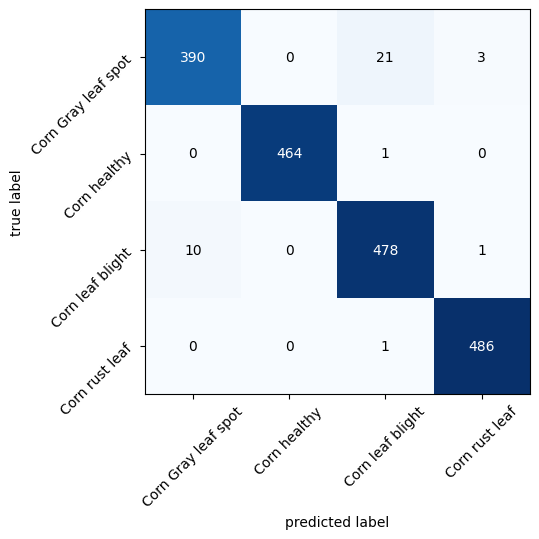

==========================Classification Report====================
Classification Report
                     precision    recall  f1-score   support

Corn Gray leaf spot       0.97      0.94      0.96       414
       Corn healthy       1.00      1.00      1.00       465
   Corn leaf blight       0.95      0.98      0.97       489
     Corn rust leaf       0.99      1.00      0.99       487

           accuracy                           0.98      1855
          macro avg       0.98      0.98      0.98      1855
       weighted avg       0.98      0.98      0.98      1855

==========================F1 Score====================
F1 Score :  0.9794233475888947


In [15]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = Mobile_Non_Aug2.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# F1 Score
print("==========================F1 Score====================")
f1_corn_mobile_non_aug2 = f1_score(validation_generator.classes, y_pred, average='macro')
print('F1 Score : ', f1_corn_mobile_non_aug2)

## DIY Version 1 Corn Non Augmented

In [16]:
# Load model
DIY_Non_Aug1 = tf.keras.models.load_model('Modelling/Corn/Non Augmented/Saved Model/Corn_DIY_model1_Based_Non_Augmented')

In [17]:
# evaluate model
print("==========================Evaluate Model====================")
scores_DIY_Non_Aug1 = DIY_Non_Aug1.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_DIY_Non_Aug1[1]*100))
print("Loss: %.6f%%" % (scores_DIY_Non_Aug1[0]*100))

==========================Evaluate Model====================
93/93 [==============================] - 3s 24ms/step - loss: 0.3311 - accuracy: 0.9499
Accuracy: 94.986522%
Loss: 33.114755%


==========================Confusion Matrix====================
93/93 [==============================] - 2s 22ms/step


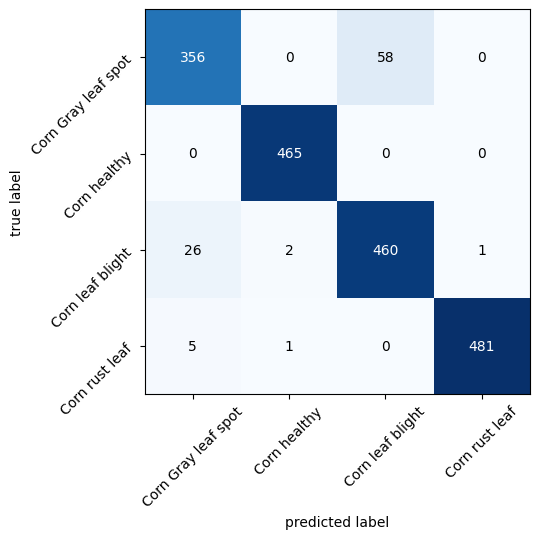

==========================Classification Report====================
Classification Report
                     precision    recall  f1-score   support

Corn Gray leaf spot       0.92      0.86      0.89       414
       Corn healthy       0.99      1.00      1.00       465
   Corn leaf blight       0.89      0.94      0.91       489
     Corn rust leaf       1.00      0.99      0.99       487

           accuracy                           0.95      1855
          macro avg       0.95      0.95      0.95      1855
       weighted avg       0.95      0.95      0.95      1855

==========================F1 Score====================
F1 Score :  0.9480135698075975


In [18]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = DIY_Non_Aug1.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# F1 Score
print("==========================F1 Score====================")
f1_corn_diy_non_aug1 = f1_score(validation_generator.classes, y_pred, average='macro')
print('F1 Score : ', f1_corn_diy_non_aug1)

## DIY Version 2 Corn Non Augmented

In [19]:
# Load model
DIY_Non_Aug2 = tf.keras.models.load_model('Modelling/Corn/Non Augmented/Saved Model/Corn_DIY_model2_Based_Non_Augmented')

In [20]:
# evaluate model
print("==========================Evaluate Model====================")
scores_DIY_Non_Aug2 = DIY_Non_Aug2.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_DIY_Non_Aug2[1]*100))
print("Loss: %.6f%%" % (scores_DIY_Non_Aug2[0]*100))

==========================Evaluate Model====================
93/93 [==============================] - 2s 22ms/step - loss: 0.1671 - accuracy: 0.9402
Accuracy: 94.016171%
Loss: 16.705063%


==========================Confusion Matrix====================
93/93 [==============================] - 2s 23ms/step


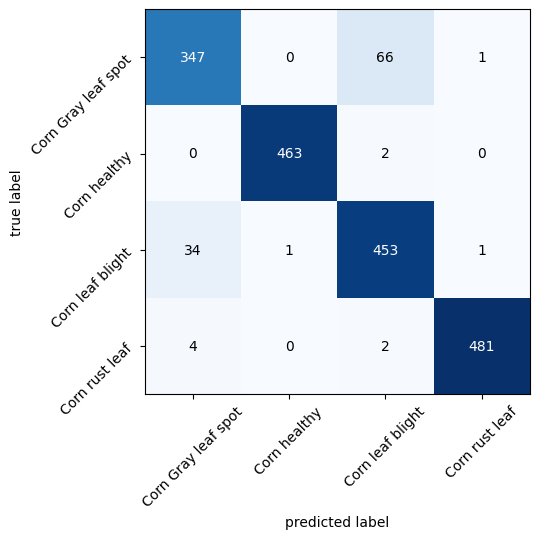

==========================Classification Report====================
Classification Report
                     precision    recall  f1-score   support

Corn Gray leaf spot       0.90      0.84      0.87       414
       Corn healthy       1.00      1.00      1.00       465
   Corn leaf blight       0.87      0.93      0.90       489
     Corn rust leaf       1.00      0.99      0.99       487

           accuracy                           0.94      1855
          macro avg       0.94      0.94      0.94      1855
       weighted avg       0.94      0.94      0.94      1855

==========================F1 Score====================
F1 Score :  0.9380914869216097


In [21]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = DIY_Non_Aug2.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# F1 Score
print("==========================F1 Score====================")
f1_corn_diy_non_aug2 = f1_score(validation_generator.classes, y_pred, average='macro')
print('F1 Score : ', f1_corn_diy_non_aug2)

## Xception Version 1 Corn Non Augmented

In [22]:
# Load model
Xception_Non_Aug1 = tf.keras.models.load_model("Modelling/Corn/Non Augmented/Saved Model/Corn_Xception_model1_Based_Non_Augmented.h5", compile=False)
Xception_Non_Aug1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Xception_Non_Aug1 = Xception_Non_Aug1.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Xception_Non_Aug1[1]*100))
print("Loss: %.6f%%" % (scores_Xception_Non_Aug1[0]*100))

==========================Evaluate Model====================
93/93 [==============================] - 7s 60ms/step - loss: 0.1161 - accuracy: 0.9844
Accuracy: 98.436660%
Loss: 11.609147%


==========================Confusion Matrix====================
93/93 [==============================] - 6s 54ms/step


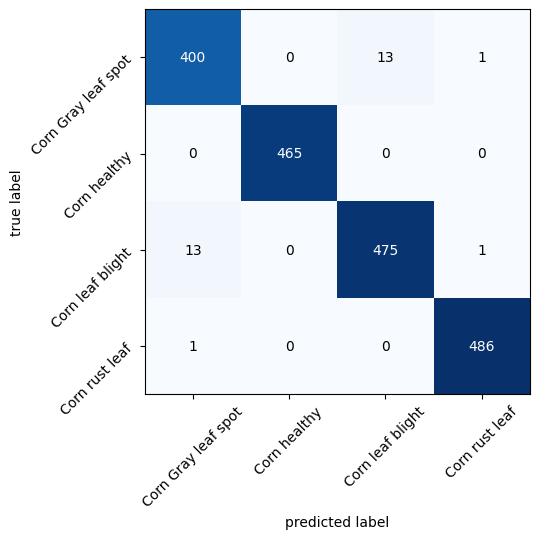

==========================Classification Report====================
Classification Report
                     precision    recall  f1-score   support

Corn Gray leaf spot       0.97      0.97      0.97       414
       Corn healthy       1.00      1.00      1.00       465
   Corn leaf blight       0.97      0.97      0.97       489
     Corn rust leaf       1.00      1.00      1.00       487

           accuracy                           0.98      1855
          macro avg       0.98      0.98      0.98      1855
       weighted avg       0.98      0.98      0.98      1855

==========================F1 Score====================
F1 Score :  0.9838677581399312


In [24]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = Xception_Non_Aug1.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# F1 Score
print("==========================F1 Score====================")
f1_corn_xception_non_aug1 = f1_score(validation_generator.classes, y_pred, average='macro')
print('F1 Score : ', f1_corn_xception_non_aug1)

## Xception Version 2 Corn Non Augmented

In [25]:
# Load model
Xception_Non_Aug2 = tf.keras.models.load_model("Modelling/Corn/Non Augmented/Saved Model/Corn_Xception_model2_Based_Non_Augmented.h5", compile=False)
Xception_Non_Aug2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Xception_Non_Aug2 = Xception_Non_Aug2.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Xception_Non_Aug2[1]*100))
print("Loss: %.6f%%" % (scores_Xception_Non_Aug2[0]*100))

==========================Evaluate Model====================
93/93 [==============================] - 6s 57ms/step - loss: 0.0644 - accuracy: 0.9849
Accuracy: 98.490566%
Loss: 6.443449%


==========================Confusion Matrix====================
93/93 [==============================] - 6s 55ms/step


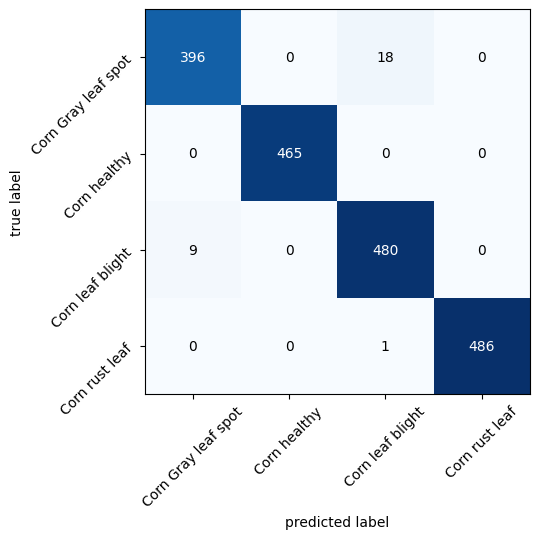

==========================Classification Report====================
Classification Report
                     precision    recall  f1-score   support

Corn Gray leaf spot       0.98      0.96      0.97       414
       Corn healthy       1.00      1.00      1.00       465
   Corn leaf blight       0.96      0.98      0.97       489
     Corn rust leaf       1.00      1.00      1.00       487

           accuracy                           0.98      1855
          macro avg       0.98      0.98      0.98      1855
       weighted avg       0.99      0.98      0.98      1855

==========================F1 Score====================
F1 Score :  0.9844162842080297


In [27]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = Xception_Non_Aug2.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# F1 Score
print("==========================F1 Score====================")
f1_corn_xception_non_aug2 = f1_score(validation_generator.classes, y_pred, average='macro')
print('F1 Score : ', f1_corn_xception_non_aug2)

# Model Augmented Evaluating

## Model Dense121 Version 1 Corn Augmented

In [28]:
# Load model
Dense_Aug1 = tf.keras.models.load_model('Modelling/Corn/Augmented/Saved Model/Corn_DenseNet_model1_Based_Augmented')

In [29]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Dense_Aug1 = Dense_Aug1.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Dense_Aug1[1]*100))
print("Loss: %.6f%%" % (scores_Dense_Aug1[0]*100))

==========================Evaluate Model====================
93/93 [==============================] - 7s 54ms/step - loss: 0.0398 - accuracy: 0.9887
Accuracy: 98.867923%
Loss: 3.975799%


==========================Confusion Matrix====================
93/93 [==============================] - 6s 50ms/step


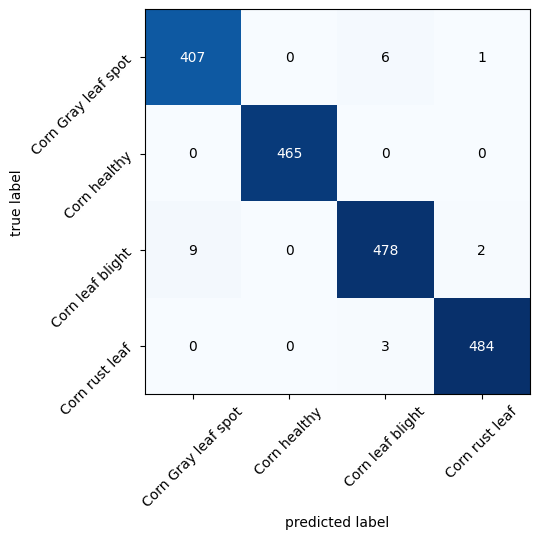

==========================Classification Report====================
Classification Report
                     precision    recall  f1-score   support

Corn Gray leaf spot       0.98      0.98      0.98       414
       Corn healthy       1.00      1.00      1.00       465
   Corn leaf blight       0.98      0.98      0.98       489
     Corn rust leaf       0.99      0.99      0.99       487

           accuracy                           0.99      1855
          macro avg       0.99      0.99      0.99      1855
       weighted avg       0.99      0.99      0.99      1855

==========================F1 Score====================
F1 Score :  0.9885177310041323


In [30]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = Dense_Aug1.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# F1 Score
print("==========================F1 Score====================")
f1_corn_dense_aug1 = f1_score(validation_generator.classes, y_pred, average='macro')
print('F1 Score : ', f1_corn_dense_aug1)

## Model Dense121 Version 2 Corn Augmented

In [31]:
# Load model
Dense_Aug2 = tf.keras.models.load_model('Modelling/Corn/Augmented/Saved Model/Corn_DenseNet_model2_Based_Augmented')

In [32]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Dense_Aug2 = Dense_Aug2.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Dense_Aug2[1]*100))
print("Loss: %.6f%%" % (scores_Dense_Aug2[0]*100))

==========================Evaluate Model====================
93/93 [==============================] - 7s 52ms/step - loss: 0.0434 - accuracy: 0.9871
Accuracy: 98.706198%
Loss: 4.338441%


==========================Confusion Matrix====================
93/93 [==============================] - 6s 47ms/step


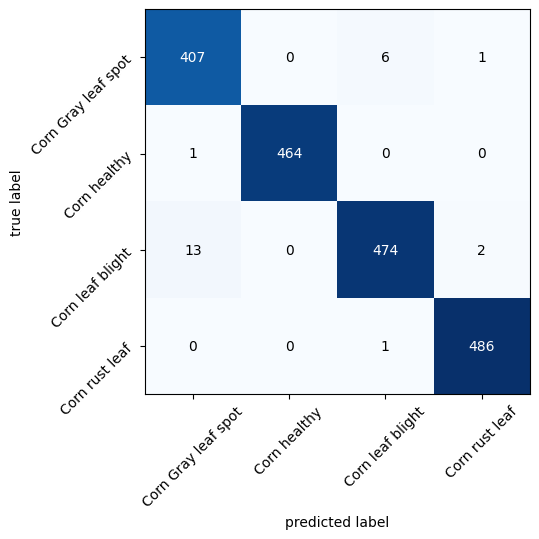

==========================Classification Report====================
Classification Report
                     precision    recall  f1-score   support

Corn Gray leaf spot       0.97      0.98      0.97       414
       Corn healthy       1.00      1.00      1.00       465
   Corn leaf blight       0.99      0.97      0.98       489
     Corn rust leaf       0.99      1.00      1.00       487

           accuracy                           0.99      1855
          macro avg       0.99      0.99      0.99      1855
       weighted avg       0.99      0.99      0.99      1855

==========================F1 Score====================
F1 Score :  0.9867487750273813


In [33]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = Dense_Aug2.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# F1 Score
print("==========================F1 Score====================")
f1_corn_dense_aug2 = f1_score(validation_generator.classes, y_pred, average='macro')
print('F1 Score : ', f1_corn_dense_aug2)

## MobileNet V2 Version 1 Corn Augmented

In [34]:
# Load model
Mobile_Aug1 = tf.keras.models.load_model('Modelling/Corn/Augmented/Saved Model/Corn_MobileNetV2_model1_Based_Augmented')

In [35]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Mobile_Aug1 = Mobile_Aug1.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Mobile_Aug1[1]*100))
print("Loss: %.6f%%" % (scores_Mobile_Aug1[0]*100))

==========================Evaluate Model====================
93/93 [==============================] - 4s 26ms/step - loss: 0.0573 - accuracy: 0.9854
Accuracy: 98.544472%
Loss: 5.732903%


==========================Confusion Matrix====================
93/93 [==============================] - 3s 24ms/step


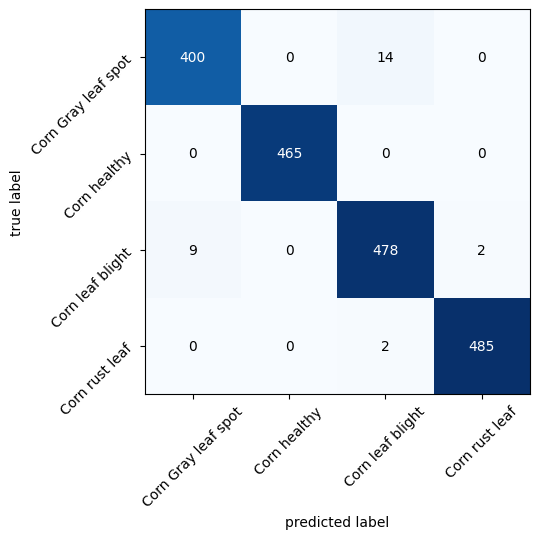

==========================Classification Report====================
Classification Report
                     precision    recall  f1-score   support

Corn Gray leaf spot       0.98      0.97      0.97       414
       Corn healthy       1.00      1.00      1.00       465
   Corn leaf blight       0.97      0.98      0.97       489
     Corn rust leaf       1.00      1.00      1.00       487

           accuracy                           0.99      1855
          macro avg       0.99      0.98      0.99      1855
       weighted avg       0.99      0.99      0.99      1855

==========================F1 Score====================
F1 Score :  0.9851199372036744


In [36]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = Mobile_Aug1.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# F1 Score
print("==========================F1 Score====================")
f1_corn_mobile_aug1 = f1_score(validation_generator.classes, y_pred, average='macro')
print('F1 Score : ', f1_corn_mobile_aug1)

## MobileNet V2 Version 2 Corn Augmented

In [37]:
# Load model
Mobile_Aug2 = tf.keras.models.load_model('Modelling/Corn/Augmented/Saved Model/Corn_MobileNetV2_model2_Based_Augmented')

In [38]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Mobile_Aug2 = Mobile_Aug2.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Mobile_Aug2[1]*100))
print("Loss: %.6f%%" % (scores_Mobile_Aug2[0]*100))

==========================Evaluate Model====================
93/93 [==============================] - 3s 27ms/step - loss: 0.0405 - accuracy: 0.9860
Accuracy: 98.598385%
Loss: 4.045446%


==========================Confusion Matrix====================
93/93 [==============================] - 3s 25ms/step


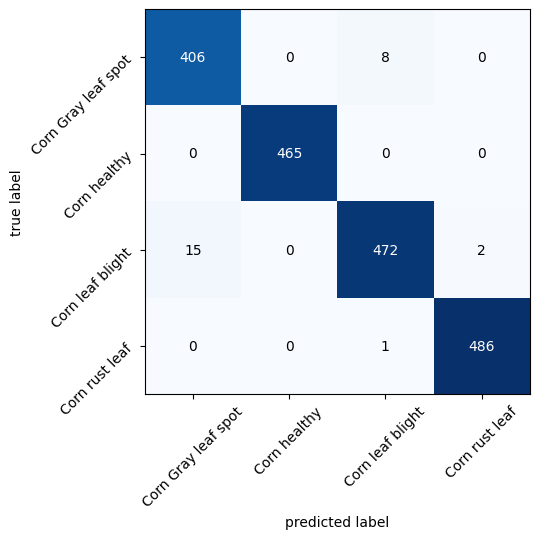

==========================Classification Report====================
Classification Report
                     precision    recall  f1-score   support

Corn Gray leaf spot       0.96      0.98      0.97       414
       Corn healthy       1.00      1.00      1.00       465
   Corn leaf blight       0.98      0.97      0.97       489
     Corn rust leaf       1.00      1.00      1.00       487

           accuracy                           0.99      1855
          macro avg       0.99      0.99      0.99      1855
       weighted avg       0.99      0.99      0.99      1855

==========================F1 Score====================
F1 Score :  0.985643510758024


In [39]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = Mobile_Aug2.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# F1 Score
print("==========================F1 Score====================")
f1_corn_mobile_aug2 = f1_score(validation_generator.classes, y_pred, average='macro')
print('F1 Score : ', f1_corn_mobile_aug2)

## Xception Version 1 Corn Augmented

In [40]:
# Load model
Xception_Aug1 = tf.keras.models.load_model("Modelling/Corn/Augmented/Saved Model/Corn_Xception_model1_Based_Augmented.h5", compile=False)
Xception_Aug1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Xception_Aug1 = Xception_Aug1.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Xception_Aug1[1]*100))
print("Loss: %.6f%%" % (scores_Xception_Aug1[0]*100))

==========================Evaluate Model====================
93/93 [==============================] - 7s 58ms/step - loss: 0.0386 - accuracy: 0.9871
Accuracy: 98.706198%
Loss: 3.863132%


==========================Confusion Matrix====================
93/93 [==============================] - 6s 54ms/step


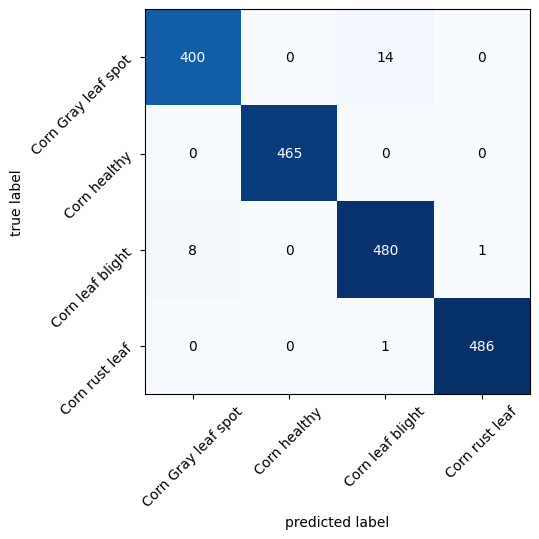

==========================Classification Report====================
Classification Report
                     precision    recall  f1-score   support

Corn Gray leaf spot       0.98      0.97      0.97       414
       Corn healthy       1.00      1.00      1.00       465
   Corn leaf blight       0.97      0.98      0.98       489
     Corn rust leaf       1.00      1.00      1.00       487

           accuracy                           0.99      1855
          macro avg       0.99      0.99      0.99      1855
       weighted avg       0.99      0.99      0.99      1855

==========================F1 Score====================
F1 Score :  0.9866980944348929


In [42]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = Xception_Aug1.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# F1 Score
print("==========================F1 Score====================")
f1_corn_Xception_aug1 = f1_score(validation_generator.classes, y_pred, average='macro')
print('F1 Score : ', f1_corn_Xception_aug1)

## Xception Version 2 Corn Augmented

In [43]:
# Load model
Xception_Aug2 = tf.keras.models.load_model("Modelling/Corn/Augmented/Saved Model/Corn_Xception_model2_Based_Augmented.h5", compile=False)
Xception_Aug2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [44]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Xception_Aug2 = Xception_Aug2.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Xception_Aug2[1]*100))
print("Loss: %.6f%%" % (scores_Xception_Aug2[0]*100))

==========================Evaluate Model====================
93/93 [==============================] - 7s 58ms/step - loss: 0.0413 - accuracy: 0.9919
Accuracy: 99.191374%
Loss: 4.125822%


==========================Confusion Matrix====================
93/93 [==============================] - 6s 55ms/step


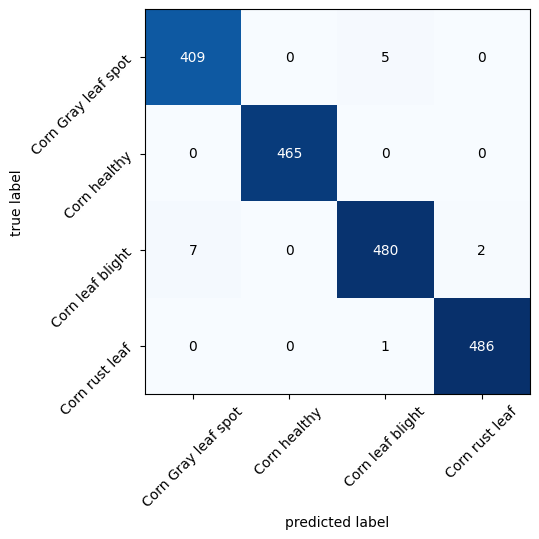

==========================Classification Report====================
Classification Report
                     precision    recall  f1-score   support

Corn Gray leaf spot       0.98      0.99      0.99       414
       Corn healthy       1.00      1.00      1.00       465
   Corn leaf blight       0.99      0.98      0.98       489
     Corn rust leaf       1.00      1.00      1.00       487

           accuracy                           0.99      1855
          macro avg       0.99      0.99      0.99      1855
       weighted avg       0.99      0.99      0.99      1855

==========================F1 Score====================
F1 Score :  0.9917701575532901


In [45]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = Xception_Aug2.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# F1 Score
print("==========================F1 Score====================")
f1_corn_Xception_aug2 = f1_score(validation_generator.classes, y_pred, average='macro')
print('F1 Score : ', f1_corn_Xception_aug2)

## DIY Version 1 Corn Augmented

In [46]:
# Load model
DIY_Aug1 = tf.keras.models.load_model('Modelling/Corn/Augmented/Saved Model/Corn_DIY_model1_Based_Augmented')

In [47]:
# evaluate model
print("==========================Evaluate Model====================")
scores_DIY_Aug1 = DIY_Aug1.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_DIY_Aug1[1]*100))
print("Loss: %.6f%%" % (scores_DIY_Aug1[0]*100))

==========================Evaluate Model====================
93/93 [==============================] - 2s 23ms/step - loss: 0.0571 - accuracy: 0.9801
Accuracy: 98.005390%
Loss: 5.711195%


==========================Confusion Matrix====================
93/93 [==============================] - 2s 22ms/step


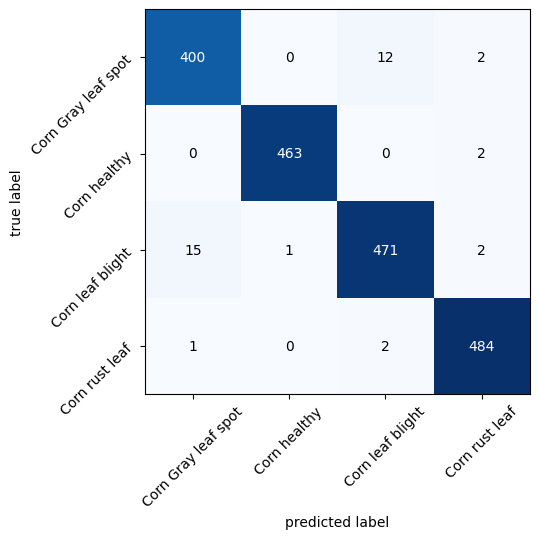

==========================Classification Report====================
Classification Report
                     precision    recall  f1-score   support

Corn Gray leaf spot       0.96      0.97      0.96       414
       Corn healthy       1.00      1.00      1.00       465
   Corn leaf blight       0.97      0.96      0.97       489
     Corn rust leaf       0.99      0.99      0.99       487

           accuracy                           0.98      1855
          macro avg       0.98      0.98      0.98      1855
       weighted avg       0.98      0.98      0.98      1855

==========================F1 Score====================
F1 Score :  0.9796400150914749


In [48]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = DIY_Aug1.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# F1 Score
print("==========================F1 Score====================")
f1_corn_DIY_aug1 = f1_score(validation_generator.classes, y_pred, average='macro')
print('F1 Score : ', f1_corn_DIY_aug1)

## DIY Version 2 Corn Augmented

In [49]:
# Load model
DIY_Aug2 = tf.keras.models.load_model('Modelling/Corn/Augmented/Saved Model/Corn_DIY_model2_Based_Augmented')

In [50]:
# evaluate model
print("==========================Evaluate Model====================")
scores_DIY_Aug2 = DIY_Aug2.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_DIY_Aug2[1]*100))
print("Loss: %.6f%%" % (scores_DIY_Aug2[0]*100))

==========================Evaluate Model====================
93/93 [==============================] - 2s 24ms/step - loss: 0.0857 - accuracy: 0.9741
Accuracy: 97.412401%
Loss: 8.570871%


==========================Confusion Matrix====================
93/93 [==============================] - 2s 24ms/step


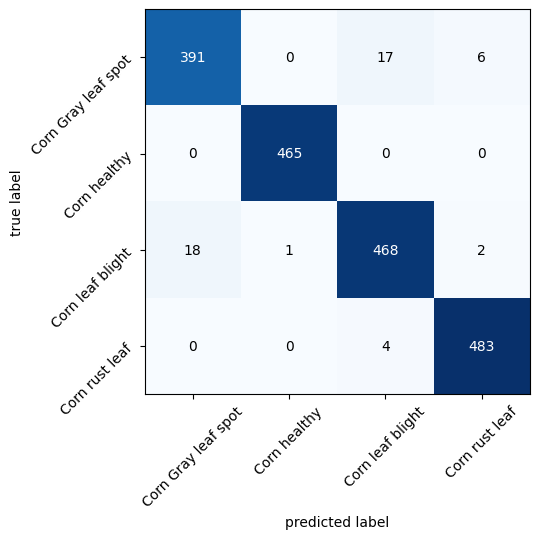

==========================Classification Report====================
Classification Report
                     precision    recall  f1-score   support

Corn Gray leaf spot       0.96      0.94      0.95       414
       Corn healthy       1.00      1.00      1.00       465
   Corn leaf blight       0.96      0.96      0.96       489
     Corn rust leaf       0.98      0.99      0.99       487

           accuracy                           0.97      1855
          macro avg       0.97      0.97      0.97      1855
       weighted avg       0.97      0.97      0.97      1855

==========================F1 Score====================
F1 Score :  0.9734733555604631


In [51]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = DIY_Aug2.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# F1 Score
print("==========================F1 Score====================")
f1_corn_DIY_aug2 = f1_score(validation_generator.classes, y_pred, average='macro')
print('F1 Score : ', f1_corn_DIY_aug2)

# Compare All

In [54]:
# Make dictionary of all models
models = {
    "Dense_Non_Aug1": Dense_Non_Aug1,
    "Dense_Non_Aug2": Dense_Non_Aug2,
    "Mobile_Non_Aug1": Mobile_Non_Aug1,
    "Mobile_Non_Aug2": Mobile_Non_Aug2,
    "DIY_Non_Aug1": DIY_Non_Aug1,
    "DIY_Non_Aug2": DIY_Non_Aug2,
    "Xception_Non_Aug1": Xception_Non_Aug1,
    "Xception_Non_Aug2": Xception_Non_Aug2,
    "Dense_Aug1": Dense_Aug1,
    "Dense_Aug2": Dense_Aug2,
    "Mobile_Aug1": Mobile_Aug1,
    "Mobile_Aug2": Mobile_Aug2,
    "Xception_Aug1": Xception_Aug1,
    "Xception_Aug2": Xception_Aug2,
    "DIY_Aug1": DIY_Aug1,
    "DIY_Aug2": DIY_Aug2
}

# Make dictionary of all accuracy scores
accuracy = {
    "Dense_Non_Aug1": scores_Dense_Non_Aug1[1],
    "Dense_Non_Aug2": scores_Dense_Non_Aug2[1],
    "Mobile_Non_Aug1": scores_Mobile_Non_Aug1[1],
    "Mobile_Non_Aug2": scores_Mobile_Non_Aug2[1],
    "DIY_Non_Aug1": scores_DIY_Non_Aug1[1],
    "DIY_Non_Aug2": scores_DIY_Non_Aug2[1],
    "Xception_Non_Aug1": scores_Xception_Non_Aug1[1],
    "Xception_Non_Aug2": scores_Xception_Non_Aug2[1],
    "Dense_Aug1": scores_Dense_Aug1[1],
    "Dense_Aug2": scores_Dense_Aug2[1],
    "Mobile_Aug1": scores_Mobile_Aug1[1],
    "Mobile_Aug2": scores_Mobile_Aug2[1],
    "Xception_Aug1": scores_Xception_Aug1[1],
    "Xception_Aug2": scores_Xception_Aug2[1],
    "DIY_Aug1": scores_DIY_Aug1[1],
    "DIY_Aug2": scores_DIY_Aug2[1]
}

# Make dictionary of all loss scores
loss = {
    "Dense_Non_Aug1": scores_Dense_Non_Aug1[0],
    "Dense_Non_Aug2": scores_Dense_Non_Aug2[0],
    "Mobile_Non_Aug1": scores_Mobile_Non_Aug1[0],
    "Mobile_Non_Aug2": scores_Mobile_Non_Aug2[0],
    "DIY_Non_Aug1": scores_DIY_Non_Aug1[0],
    "DIY_Non_Aug2": scores_DIY_Non_Aug2[0],
    "Xception_Non_Aug1": scores_Xception_Non_Aug1[0],
    "Xception_Non_Aug2": scores_Xception_Non_Aug2[0],
    "Dense_Aug1": scores_Dense_Aug1[0],
    "Dense_Aug2": scores_Dense_Aug2[0],
    "Mobile_Aug1": scores_Mobile_Aug1[0],
    "Mobile_Aug2": scores_Mobile_Aug2[0],
    "Xception_Aug1": scores_Xception_Aug1[0],
    "Xception_Aug2": scores_Xception_Aug2[0],
    "DIY_Aug1": scores_DIY_Aug1[0],
    "DIY_Aug2": scores_DIY_Aug2[0]
}

# f1
f1 = {
    "Dense_Non_Aug1": f1_corn_dense_non_aug1,
    "Dense_Non_Aug2": f1_corn_dense_non_aug2,
    "Mobile_Non_Aug1": f1_corn_mobile_non_aug1,
    "Mobile_Non_Aug2": f1_corn_mobile_non_aug2,
    "DIY_Non_Aug1": f1_corn_diy_non_aug1,
    "DIY_Non_Aug2": f1_corn_diy_non_aug2,
    "Xception_Non_Aug1": f1_corn_xception_non_aug1,
    "Xception_Non_Aug2": f1_corn_xception_non_aug2,
    "Dense_Aug1": f1_corn_dense_aug1,
    "Dense_Aug2": f1_corn_dense_aug2,
    "Mobile_Aug1": f1_corn_mobile_aug1,
    "Mobile_Aug2": f1_corn_mobile_aug2,
    "Xception_Aug1": f1_corn_Xception_aug1,
    "Xception_Aug2": f1_corn_Xception_aug2,
    "DIY_Aug1": f1_corn_DIY_aug1,
    "DIY_Aug2": f1_corn_DIY_aug2
}

# Make dataframe of all models, accuracy, loss, and f1 score
df = pd.DataFrame(list(zip(models.keys(), accuracy.values(), loss.values(), f1.values())), columns =['Model', 'Accuracy', 'Loss', 'F1'])

# Sort dataframe by accuracy
df = df.sort_values(by=['Accuracy'], ascending=False)

# Print dataframe
print(df)

                Model  Accuracy      Loss        F1
13      Xception_Aug2  0.991914  0.041258  0.991770
8          Dense_Aug1  0.988679  0.039758  0.988518
1      Dense_Non_Aug2  0.987601  0.055250  0.987187
9          Dense_Aug2  0.987062  0.043384  0.986749
12      Xception_Aug1  0.987062  0.038631  0.986698
0      Dense_Non_Aug1  0.985984  0.048882  0.985592
11        Mobile_Aug2  0.985984  0.040454  0.985644
10        Mobile_Aug1  0.985445  0.057329  0.985120
2     Mobile_Non_Aug1  0.984906  0.071778  0.984463
7   Xception_Non_Aug2  0.984906  0.064434  0.984416
6   Xception_Non_Aug1  0.984367  0.116091  0.983868
3     Mobile_Non_Aug2  0.980054  0.092685  0.979423
14           DIY_Aug1  0.980054  0.057112  0.979640
15           DIY_Aug2  0.974124  0.085709  0.973473
4        DIY_Non_Aug1  0.949865  0.331148  0.948014
5        DIY_Non_Aug2  0.940162  0.167051  0.938091


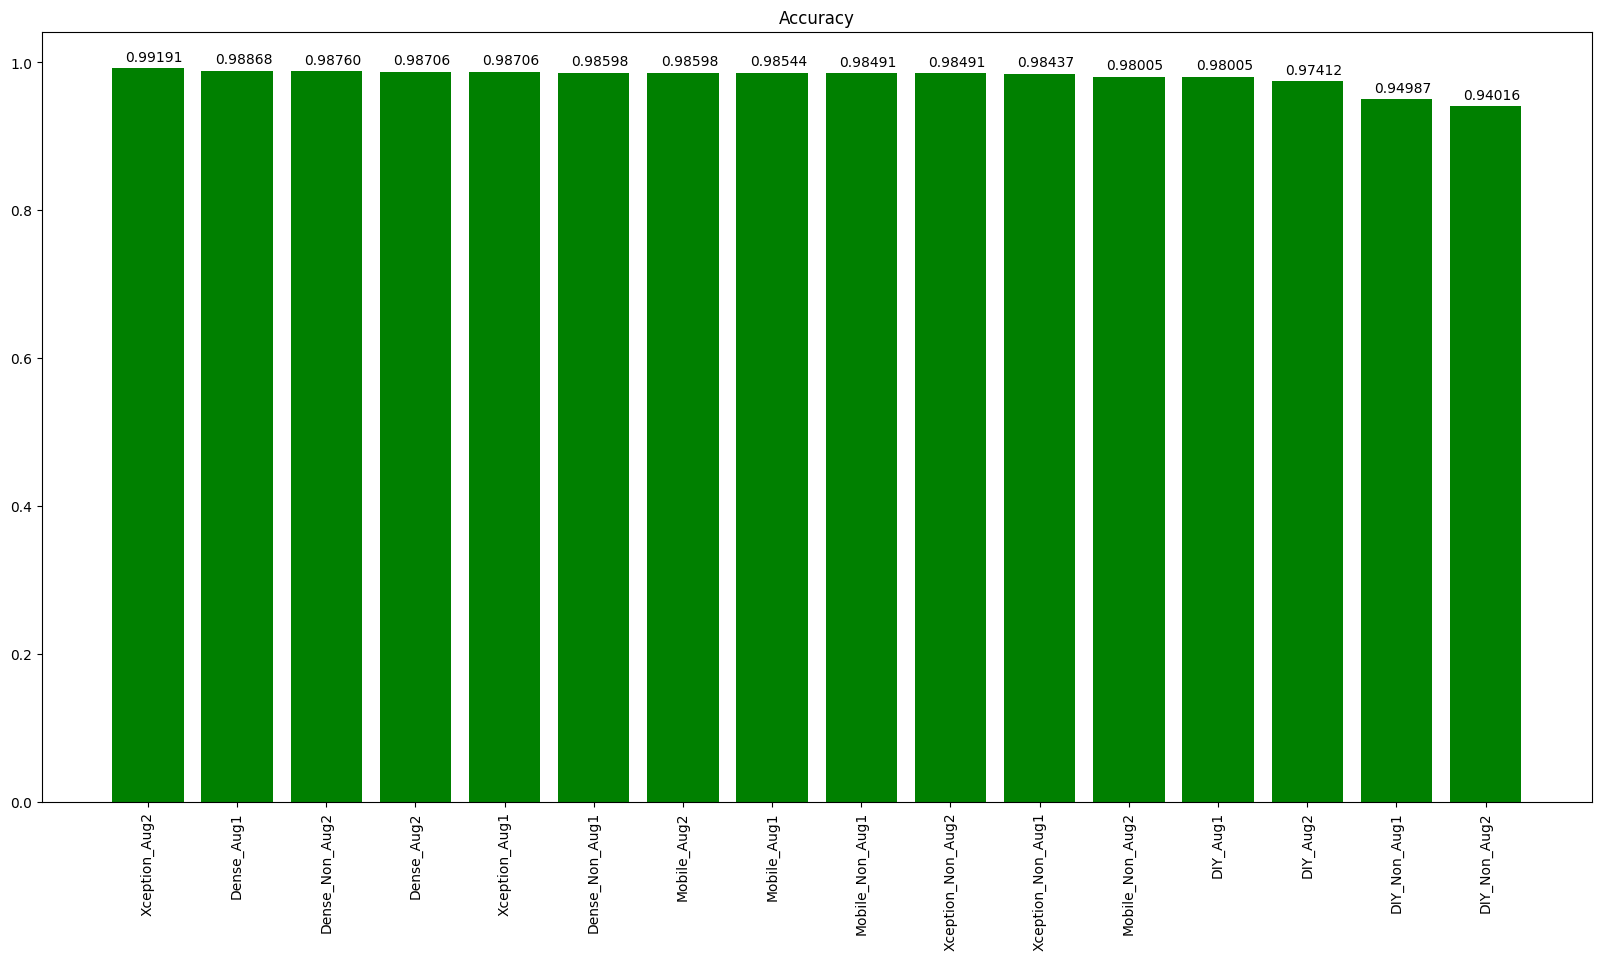

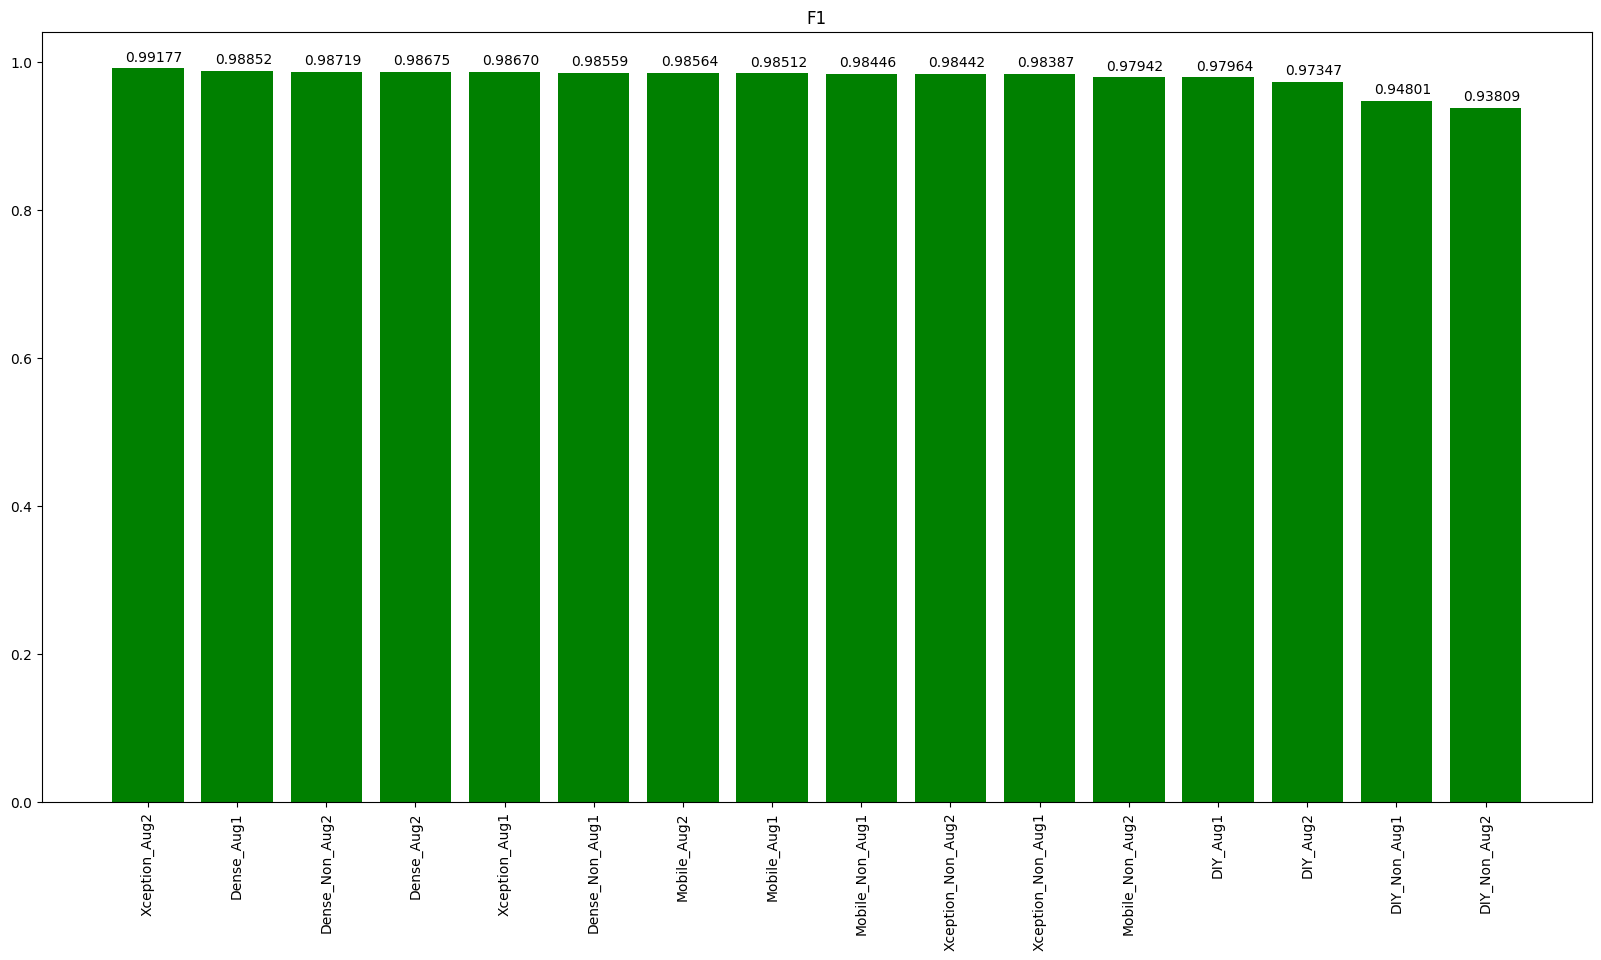

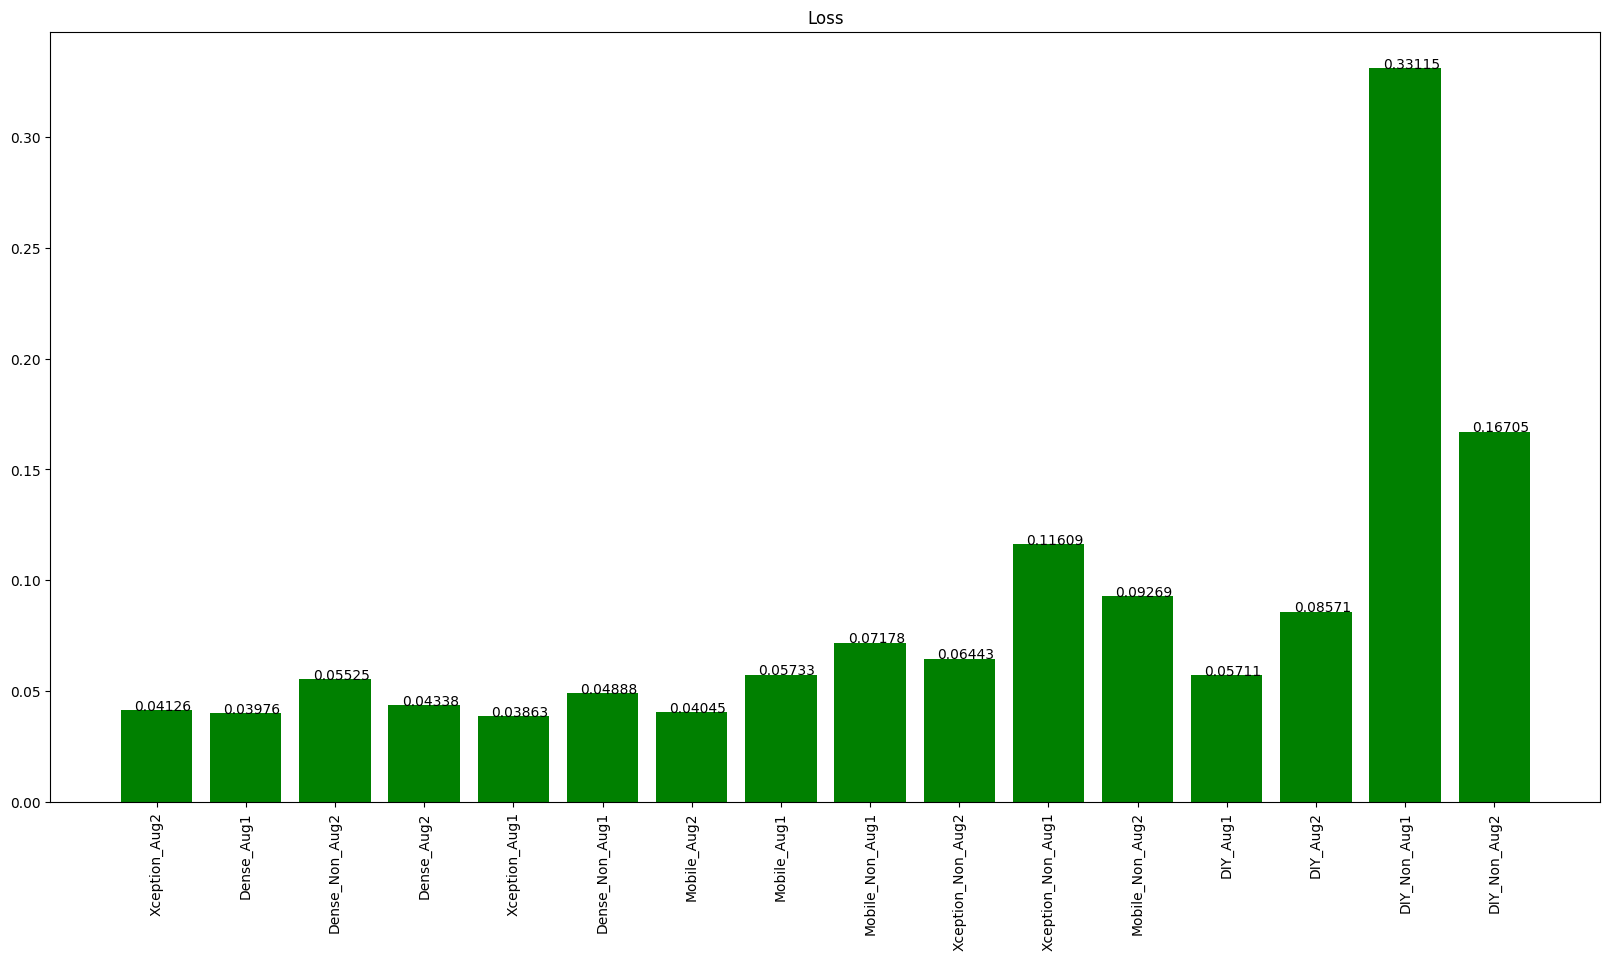

In [55]:
# make multiple plots for accuracy, f1 and loss with annotations
# Accuracy
plt.figure(figsize=(20, 10))
plt.title('Accuracy')
plt.bar(df['Model'], df['Accuracy'], color='green')
plt.xticks(rotation=90)
for i, v in enumerate(df['Accuracy']):
    plt.text(i - 0.25, v + 0.01, '{0:.5f}'.format(v))
plt.show()

# F1
plt.figure(figsize=(20, 10))
plt.title('F1')
plt.bar(df['Model'], df['F1'], color='green')
plt.xticks(rotation=90)
for i, v in enumerate(df['F1']):
    plt.text(i - 0.25, v + 0.01, '{0:.5f}'.format(v))
plt.show()

# Loss
plt.figure(figsize=(20, 10))
plt.title('Loss')
plt.bar(df['Model'], df['Loss'], color='green')
plt.xticks(rotation=90)
for i, v in enumerate(df['Loss']):
    plt.text(i - 0.25, v + 0.0001, '{0:.5f}'.format(v))
plt.show()